<a id='head'></a>


### [Строки](#string)
- [Функции строк для заголовков датафрейма](#string_01)

### [Циклы](#cycle)
- [Обратный цикл перебора словаря](#cycle_01)
- [Замена дубликатов в DF (простая)](#cycle_02)
- [Замена дубликатов в DF (улучшенная)](#cycle_03)
- [Перебор комбинации значений из двух списков](#cycle_04)
- [Пример цикла While](#cycle_05)

### [Условия](#if_else)
- [try... except](#if_else_01)
- [Короткая запись условия](#if_else_02)

### [Функции](#function)
- [Перебор вхождения строки в элемент из списка значений](#function_01)
- [Поиск значений усов коробки с усами](#function_02)

### [Lambda функции](#lambda_function)
- [Пример](#lambda_function_01)

### [Генераторы списков](#list_comprehension)

### [Распаковка списков](#unpack_list)

### OS

### [Диаграммы и Графики](#plt)
- [Heatmap для матрицы корреляции](#plt_01)
- [Seaborn Pairplot](#plt_02)

### [Наборы полезного кода](#prosthesis)
- [Предварительный обзор данных](#prost_01)
- [Измерение времени выполнения тетрадки](#prost_02)

### [ML](#ml)

<a id='string'></a>

# Строки  [▴](#head)

<a id='string_01'></a>
## Функции строк для заголовков датафрейма [▴](#head)

In [15]:
import pandas as pd
df = pd.read_csv('datasets/music.csv')
print(df.columns)

# __________Начало___________

df.columns = df.columns.str.lower().str.replace(' ', '_').str.strip('_')

# str.lower() переводит символы в нижний регистр
# str.replace(' ', '_') заменяет все пробелы на '_'
# strip('_') стирает все '_' слева и справа от строки

# __________Конец___________

print(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')
Index(['userid', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


In [14]:
a = '  Привет как дела   '
print(a)

a = a.replace(' ', '_')
print(a)

a = a.strip('_')
print(a)

  Привет как дела   
__Привет_как_дела___
Привет_как_дела


<a id='cycle'></a>
<div style="border:solid orange 2px; padding: 40px">
    <h1><p style="text-align: center;">Циклы</p></h1>
</div>

<a id='cycle_01'></a>
<div class="alert alert-info">
    <h3>Обратный цикл перебора словаря</h3>
</div>

In [17]:
test_dict = {"Слово": ['Славо', "Слуво", "Сливо"], "Огонь": ["Кинь", "Конь"]}
for item in test_dict.items():
    for val in item[1]:
        print(val, "->", item[0])

Славо -> Слово
Слуво -> Слово
Сливо -> Слово
Кинь -> Огонь
Конь -> Огонь


# [▴](#head)

<a id='cycle_02'></a>
<div class="alert alert-info">
    <h3>Замена дубликатов в DF (простая)</h3>
</div>

In [3]:
import pandas as pd
df = pd.read_csv('datasets/music.csv')
df.fillna('Нету', inplace=True)
print(list(filter(lambda x: 'hip' in x or 'hop' in x, df['genre'].sort_values().unique())))

# __________Начало___________
def replace_wrong_genres(wrong_genres, correct_genre):
    for wrong_genre in wrong_genres:
        df['genre'] = df['genre'].replace(wrong_genre, correct_genre)

replace_wrong_genres(['hip-hop', 'hip', 'hop'], 'hiphop')
# __________Конец___________

print(list(filter(lambda x: 'hip' in x or 'hop' in x, df['genre'].sort_values().unique())))

['hip', 'hip-hop', 'hiphop', 'hop', 'triphop']
['hiphop', 'triphop']


# [▴](#head)

<a id='cycle_03'></a>
<div class="alert alert-info">
    <h3>Замена дубликатов в DF (улучшеная)</h3>
</div>

In [4]:
import pandas as pd
df = pd.read_csv('datasets/music.csv')
df.fillna('Нету', inplace=True)
print(list(filter(lambda x: 'hip' in x or 'hop' in x or 'эл' in x or 'electronic' in x, df['genre'].sort_values().unique())))

# __________Начало___________
def replace_wrong_genres_upgrade(genres_duplicates): # принимаем на вход словарь с данными о дубликатах
    for item in genres_duplicates.items(): # обходим каждый элемент словаря, распаковывая их в кортеж
        for val in item[1]: # в кортеже создаем цикл на обход списка (по сути это значение ключа словаря со списком дубликатов)
            df['genre'] = df['genre'].replace(val, item[0]) # заменяем каждый дубликат на верное значение (ключ словаря)

duplicates_dict = {'hiphop': ['hip-hop', 'hip', 'hop'], 'electronic': ['электроника']} # наборов может быть сколько угодно
replace_wrong_genres_upgrade(duplicates_dict)
# __________Конец___________

print(list(filter(lambda x: 'hip' in x or 'hop' in x or 'эл' in x or 'electronic' in x, df['genre'].sort_values().unique())))

['electronic', 'hip', 'hip-hop', 'hiphop', 'hop', 'loungeelectronic', 'popelectronic', 'triphop', 'электроника']
['electronic', 'hiphop', 'loungeelectronic', 'popelectronic', 'triphop']


# [▴](#head)

<a id='cycle_04'></a>
<div class="alert alert-info">
    <h3>Перебор комбинации значений из двух списков</h3>
</div>

In [20]:
import itertools
first_list = ['A', 'B']
second_list = ['c', 'd', 'e']
print(list(itertools.product(first_list, second_list)))

[('A', 'c'), ('A', 'd'), ('A', 'e'), ('B', 'c'), ('B', 'd'), ('B', 'e')]


# [▴](#head)

In [21]:
first_list = ['A', 'B']
second_list = ['c', 'd', 'e']
new_list = []
for i in first_list:
    for j in second_list:
        new_list.append([i, j])
print(new_list)

[['A', 'c'], ['A', 'd'], ['A', 'e'], ['B', 'c'], ['B', 'd'], ['B', 'e']]


# [▴](#head)

<a id='cycle_05'></a>
<div class="alert alert-info">
    <h3>Пример цикла While</h3>
</div>

In [22]:
import random

total_weight = 0
capacity = 300

while total_weight < capacity: # пока суммарный вес меньше грузоподъёмности лифта
    person_weight = random.randint(30, 120) # генерируется случайное целое число от 30 до 120
    total_weight += person_weight # сгенерированный вес добавляется к суммарному весу

# [▴](#head)

In [23]:
import numpy as np

spots = np.array([[2,3,4,5,6,7], # имя переменной spots по-английски значит «пятна»
    [3,4,5,6,7,8], 
    [4,5,6,7,8,9], 
    [5,6,7,8,9,10], 
    [6,7,8,9,10,11],
    [7,8,9,10,11,12]])

spot_counts = {}

for i in range(0, 6):
        for j in range(0, 6):
                if spots[i][j] not in spot_counts.keys():
                        spot_counts[spots[i][j]] = 1
                else:
                        spot_counts[spots[i][j]] += 1

print(spot_counts)

spot_probs={k:spot_counts[k]/36 for k in spot_counts} #dictionary comprehension
print(spot_probs)

{2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 5, 9: 4, 10: 3, 11: 2, 12: 1}
{2: 0.027777777777777776, 3: 0.05555555555555555, 4: 0.08333333333333333, 5: 0.1111111111111111, 6: 0.1388888888888889, 7: 0.16666666666666666, 8: 0.1388888888888889, 9: 0.1111111111111111, 10: 0.08333333333333333, 11: 0.05555555555555555, 12: 0.027777777777777776}


# [▴](#head)

<a id='if_else'></a>
<div style="border:solid orange 2px; padding: 40px">
    <h1><p style="text-align: center;">Условия</p></h1>
</div>

<a id='if_else_01'></a>
<div class="alert alert-info">
    <h3>try ... except</h3>
</div>

In [24]:
try:
    print(1 / 0)
except:
    print('Проверьте значения параметров a и b')
print('Кстати, хорошего дня') 

Проверьте значения параметров a и b
Кстати, хорошего дня


# [▴](#head)

<a id='if_else_02'></a>
<div class="alert alert-info">
    <h3>Короткая запись условия</h3>
</div>

In [25]:
p = 1
x = ("Yes" if p == 1 else "Нет или не уверен")
print(x)

Yes


# [▴](#head)

<a id='function'></a>
<div style="border:solid orange 2px; padding: 40px">
    <h1><p style="text-align: center;">Функции</p></h1>
</div>

<a id='function_01'></a>
<div class="alert alert-info">
    <h3>Перебор вхождения строки в элемент из списка значений</h3>
</div>

In [ ]:
# создадим 4 списка, для каждой из категорий и впишем туда необходимые корни слов

auto_list = ['авто'] # автомобильный
education_list = ['образ'] # образование
realty_list = ['жиль', 'недв'] # недвижимость
wedding_list = ['свадь'] # свадьба

# сначала создадим функцию-помощника, которая будет перебирать список корней 
# и проверять вхождение этого корня в строковое значение

def str_in_val_list(str_val, words): # принимаем на вход строковое значение для проверки и список корней
    for word in words: # для каждого корня в списке корней
        if word in str_val: # если корень входит в строковое значение
            return True # возвращаем True
    return False # иначе False


# теперь создаем основную рабочую функцию

def categorise_purpose(cell): # принимием на вход значение ячейки (это наше строковое значение)
    if str_in_val_list(cell, auto_list): # вызываем функцию-помощника, которой передаем значение ячейки и список на проверку
        return 'операции с автомобилем' # если функция-помощник возвращает нам True, то основная возвращает нужную категорию
    elif str_in_val_list(cell, realty_list):
        return 'операции с недвижимостью'
    elif str_in_val_list(cell, wedding_list):
        return 'проведение свадьбы'
    elif str_in_val_list(cell, education_list):
        return 'получение образования'
    else:
        return 'без категории' # если все вызовы функций-помощников вернули нам False, то получаем на выходе "без категорий"


# применим нашу функцию с столбцу "purpose".
# результат работы функции поместим в новый столбец "purpose_category"

df['purpose_category'] = df['purpose'].apply(categorise_purpose)

# [▴](#head)

In [ ]:
def calculate_total_price(count, price): 
    total = count * price 
    if total > 1000: 
        total -= total * 0.05 
    return total

items_list = [
    [3, 100.0],
    [2, 501.0],
    [10, 40]
]

for item in items_list:
    print(calculate_total_price(item[0], item[1])) 

# [▴](#head)

In [ ]:
def func(x, y):
    if z > y:
        return 'First'
    elif x < y:
        return 'Second'
    else: 
        return 'Equal'

# [▴](#head)

<a id='function_02'></a>
<div class="alert alert-info">
    <h3>Поиск значений усов коробки с усами</h3>
</div>

In [ ]:
def whisker_find(df_ser):
    dict_from_desc = df_ser.describe().to_dict()
    bottom_whisker = dict_from_desc['25%'] - ((dict_from_desc['75%'] - dict_from_desc['25%']) * 1.5)
    top_whisker = dict_from_desc['75%'] + ((dict_from_desc['75%'] - dict_from_desc['25%']) * 1.5)
    if bottom_whisker < dict_from_desc['min']:
        bottom_whisker = dict_from_desc['min']
    return round(bottom_whisker, 2), round(top_whisker, 2)

print(whisker_find(df['colname']))

# [▴](#head)

<a id='lambda_function'></a>
<div style="border:solid orange 2px; padding: 40px">
    <h1><p style="text-align: center;">Lambda функции</p></h1>
</div>

Лямбда-функции — функции, которые создаются в одну строку. После ключевого слова `lambda` указывают две части лямбда-функции:
перед двоеточием: аргумент, который получит функция;
после двоеточия: инструкция, которую функция выполнит.


`lambda <аргумент>: <инструкция>`

<a id='lambda_function_01'></a>
<div class="alert alert-info">
    <h3>Пример</h3>
</div>

In [ ]:
# обычная
def func(p, f, S, L): 
    return S * (1 + p / f) ** (f * L) - S

# Lambda
func = lambda p, f, S, L: S * (1 + p / f) ** (f * L) - S

In [ ]:
def func(x):
    return x + 1

func = lambda x: x + 1

In [ ]:
def func(x, y): 
    return x + y

func = lambda x, y: x + y 

In [ ]:
my_list = [(1, 1), (2, 0), (3, 4), (1, -1), (2, 2)]
print(sorted(my_list, key=lambda x: x[1]))

In [ ]:
my_list = [0, 0, -1, -2, -3, 4, 3, 2, 5] 
print(list(map(lambda x: abs(x), my_list)))

In [ ]:
my_list = [1, 2, 3, 4, 5]
print(list(map(lambda x: x**2, my_list)))
for item in map(lambda x: x ** 2, my_list):
    print(item, end=' ')

In [ ]:
a = [1, 2, 3, 4, 5]
b = [6, 7, 8, 9, 10]
print(list(map(lambda x, y: x * y, a, b)), "- Перемножение списков")
print(list(map(lambda x, y: x + y, a, b)), "- Пересложение списков")

In [ ]:
my_list = [0, 0, -1, -2, -3, 4, 3, 2, 5]
print(list(filter(lambda x: x<=0, my_list)))

In [ ]:
movies_table_sorted = sorted(movies_table, key=lambda row: row[5])

# [▴](#head)

<a id='list_comprehension'></a>
<div style="border:solid orange 2px; padding: 40px">
    <h1><p style="text-align: center;">Генераторы списков</p></h1>
</div>

In [ ]:
x = [k ** 2 for k in range(2, 12, 3)] # Расшифровывается как: Для каждого К от 2 до 12 c шагом 3, вернуть K**2 
x = [k ** 2 for k in range(2, 12, 3) if k != 8] # Для каждого К от 2 до 12 с шагом 3, вернуть К**2 если K!=8
x = (k ** 2 for k in range(2, 12, 3)) # Если использовать круглые скобки, то X = <class 'generator'>

In [ ]:
print([line.split(': ') for line in s1.split('\n') if line])

In [ ]:
print("\n".join([" ".join(line.split(': ')) for line in s2.split('\n') if line]))

In [ ]:
list = [x for x in range(1, 21) if x > 1 and all(x % i != 0 for i in range(2, x))]

# [▴](#head)

<a id='unpack_list'></a>

# Распаковка списков [▴](#head)

In [ ]:
my_list = ["А", 2, None]
x, y, z = my_list

In [ ]:
x, y = (1, "а")

In [ ]:
for index, value in enumerate(my_list):
    print(index, value)

<a id='plt'></a>

# Диаграммы и графики [▴](#head)

<a id='plt_01'></a>

## Heatmap для матрицы корреляции [▴](#head)

Text(0.5, 1.0, 'Корреляционная матрица')

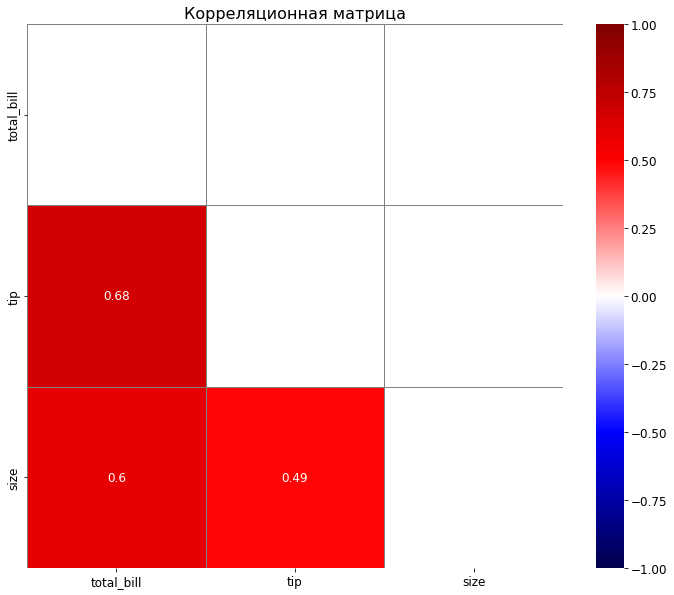

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('tips')

plt.figure(figsize=(12,10))
corr_matrix = sns.heatmap(df.corr(), 
                          annot=True, 
                          vmin=-1, vmax=1, center=0, 
                          cmap='seismic', # или coolwarm https://matplotlib.org/stable/gallery/color/colormap_reference.html
                          mask=(np.tri(len(df.corr())).T),
                          linewidths=1,
                          linecolor='grey')

corr_matrix.set_title("Корреляционная матрица", fontsize=16)

# Маски:
# mask = np.triu(df.corr())
# mask = np.tril(df.corr())

<a id='plt_02'></a>

## Seaborn Pairplot  [▴](#head)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.pairplot(df)
plt.show()

## Работа с осями [▴](#head)

- https://python-graph-gallery.com - Сайт с примерами графиков на Python.
- https://datavizcatalogue.com - Сайт с примерами, для того чтобы разобраться с названиями. Без примеров на Python
- https://seaborn.pydata.org/examples/index.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# массив данных для тестового графика

xs = np.linspace(0, 2 * np.pi, 100)
ys = np.sin(xs) * 2 + np.random.rand(*xs.shape)

Text(0, 0.5, 'Ось Y')

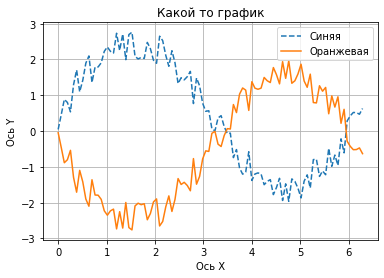

In [4]:
plt.plot(xs, ys, ls='--', label='Синяя')
plt.plot(xs, -ys, label='Оранжевая')
plt.legend()
plt.grid()
plt.title('Какой то график')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')

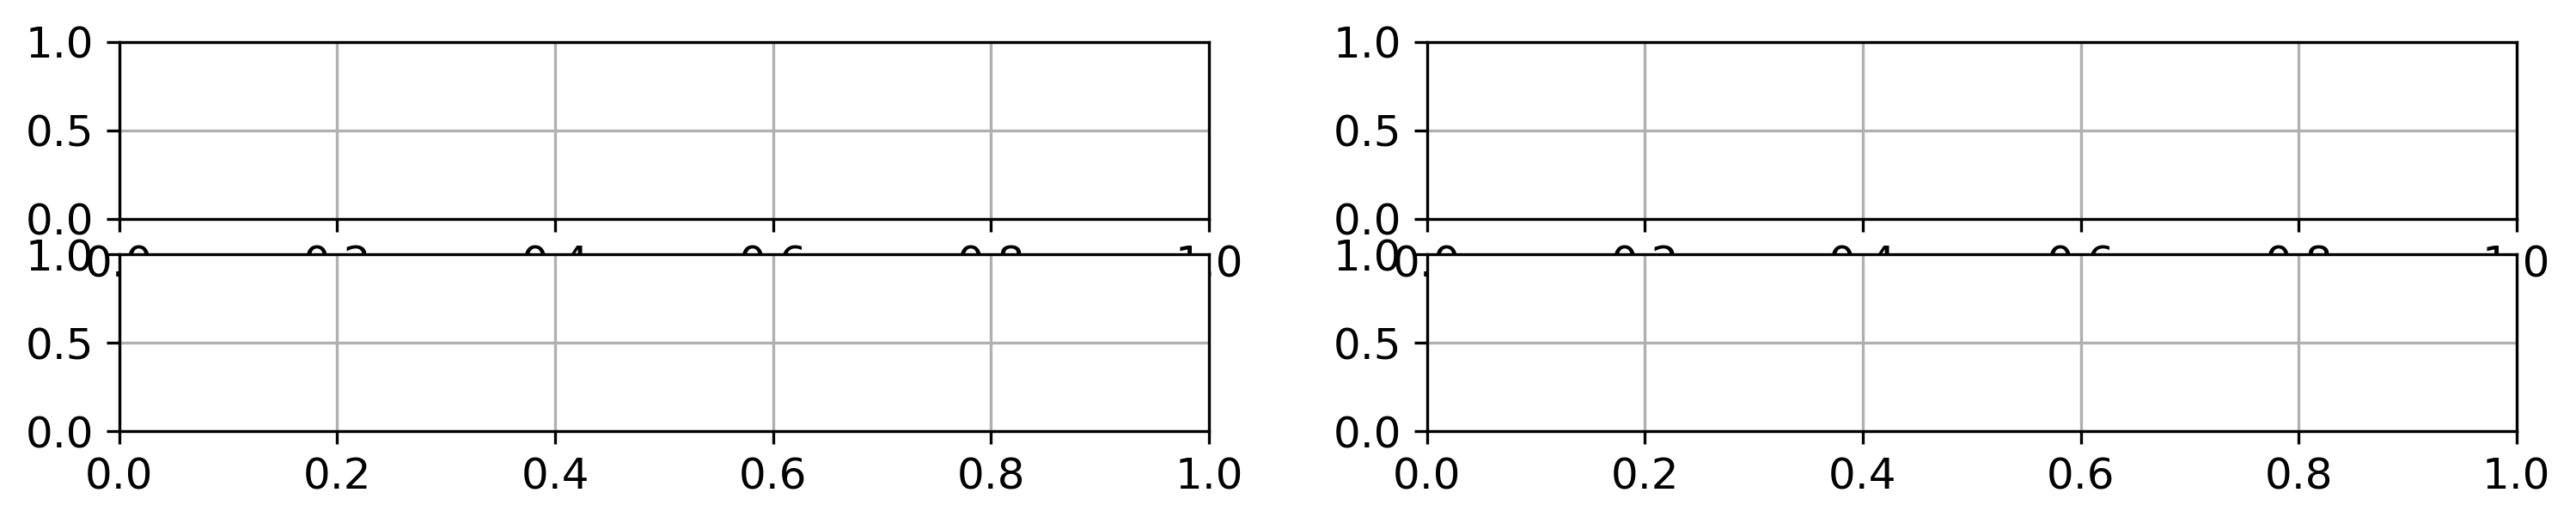

In [90]:
figure, axis = plt.subplots(2, 2, figsize=(12, 2), dpi=300)

In [88]:
axis.shape

(2, 2)

In [7]:
axis

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

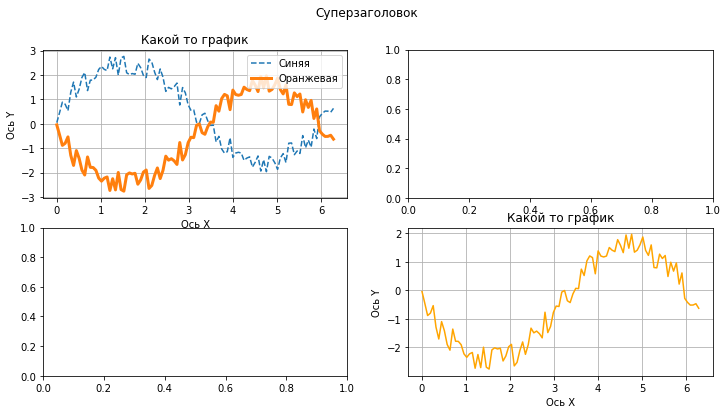

In [8]:
figure, axis = plt.subplots(2, 2, figsize=(12, 6), dpi=72)
axis[0,0].plot(xs, ys, ls='--', label='Синяя')
axis[0,0].plot(xs, -ys, lw=3, label='Оранжевая')
axis[0,0].legend()
axis[0,0].grid()
axis[0,0].set_title('Какой то график')
axis[0,0].set_xlabel('Ось X')
axis[0,0].set_ylabel('Ось Y')

axis[1,1].plot(xs, -ys, c='orange')
axis[1,1].grid()
axis[1,1].set_title('Какой то график')
axis[1,1].set_xlabel('Ось X')
axis[1,1].set_ylabel('Ось Y')

plt.suptitle('Суперзаголовок')
plt.show()

(2, 2)
(4,)


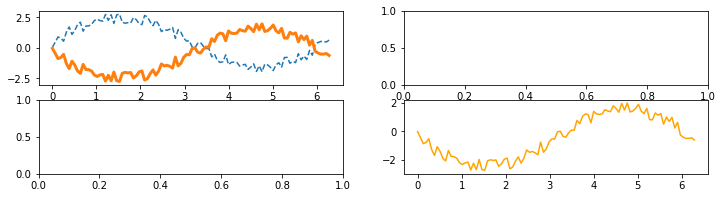

In [9]:
figure, axis = plt.subplots(2, 2, figsize=(12, 3), dpi=72)
print(axis.shape)

axis = axis.ravel() 
# ravel распремляет двумерный массив
# после этого можно обраться по одному индексу
print(axis.shape)

axis[0].plot(xs, ys, ls='--', label='Синяя')
axis[0].plot(xs, -ys, lw=3, label='Оранжевая')

axis[3].plot(xs, -ys, c='orange')
plt.show()

## Столбчатая диаграмма [▴](#head)

In [10]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
s = df.groupby('sex')['tip'].mean()
s

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

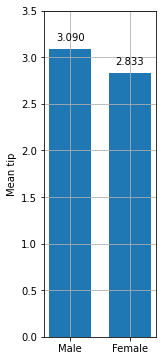

In [12]:
plt.figure(figsize=(2, 6))
plt.bar(s.index, s, width=0.7)
plt.ylabel('Mean tip')
plt.grid()
plt.ylim(0, 3.5)

# Нанесение подписей на диаграмму
for i in range(len(s)):
    plt.text(s.index[i], 1.03 * s[i], f'{s[i]:.3f}', ha='center')

## Распределение [▴](#head)

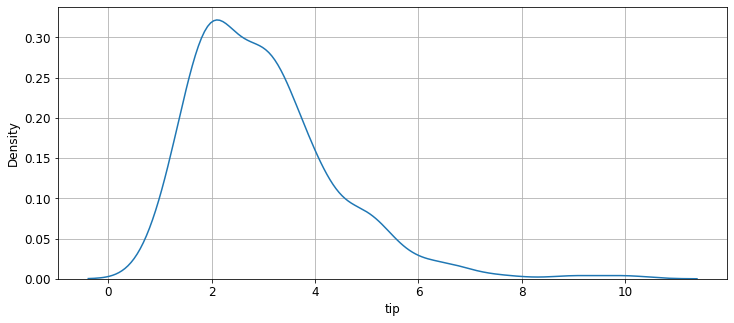

In [32]:
# истинное распределение

# Kernel Density Estimate (KDE) - Оценка плотности распределения

sns.kdeplot(df['tip'])
plt.show()

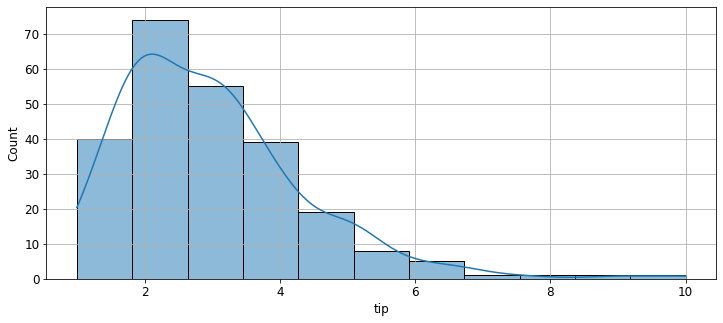

In [42]:
sns.histplot(df['tip'], kde=True, bins=11)
plt.show()

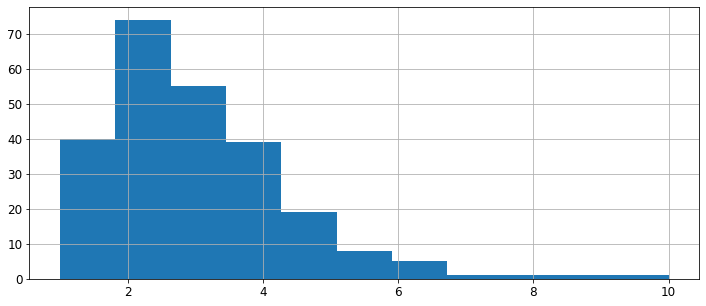

In [52]:
plt.hist(df['tip'], bins=11, rwidth=1)
plt.show()

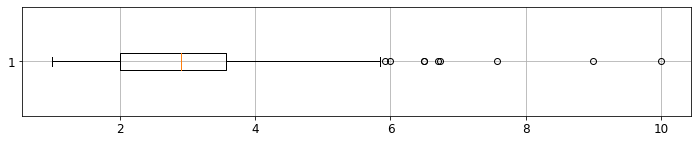

In [51]:
plt.figure(figsize=(12, 2))
plt.boxplot(df['tip'], vert=False)
plt.show()

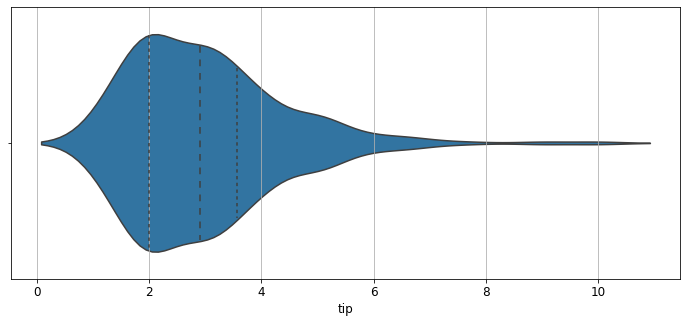

In [85]:
# boxplot + kdeplot
sns.violinplot(data=df, x='tip', inner='quart')
plt.show()

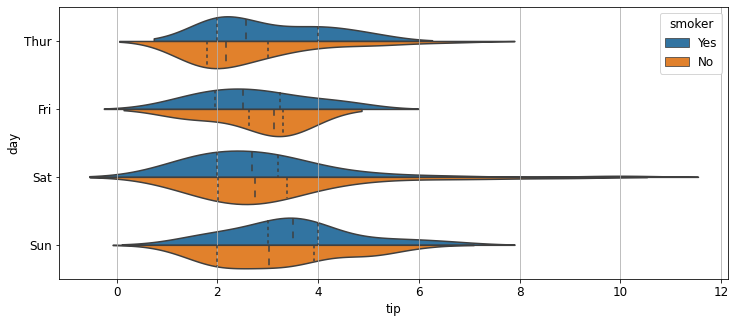

In [82]:
# boxplot + kdeplot
sns.violinplot(data=df, y='day', x='tip', hue='smoker', split=True, inner="quart")
plt.show()

## Корреляция [▴](#head)

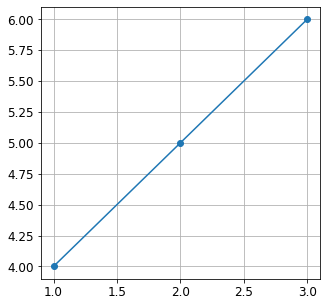

In [98]:
plt.figure(figsize=(5, 5))
plt.plot([1, 2, 3], [4, 5, 6], marker='o')
plt.show()

In [106]:
df[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


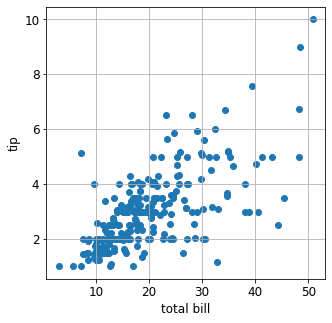

In [107]:
plt.figure(figsize=(5, 5))
plt.scatter(x=df['total_bill'], y=df['tip'])
plt.xlabel('total bill')
plt.ylabel('tip')
plt.show()

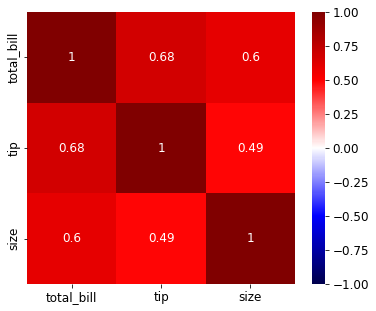

In [114]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), 
            annot=True, 
            cmap='seismic', 
            vmin=-1, vmax=1, center=0)
plt.show()

## Стили графиков [▴](#head)

In [125]:
# Список доступных стилей
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [126]:
# Применение нужного стиля
plt.style.use('seaborn-talk')

## Настройка своего стиля [▴](#head)

In [ ]:
# Посмотреть текущие параметры
plt.rcParams

In [19]:
# Обновить нужный параметр с помощью словаря
plt.rcParams.update({'font.size': 12,
                     'figure.figsize': (12,5),
                     'axes.grid': True})

In [147]:
plt.rcParams['figure.figsize'] = (12, 5) # задать размер figure по умолчанию
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 20

<a id='prosthesis'></a>
# Наборы полезного кода [▴](#head)

<a id='prost_01'></a>

## Предварительный обзор данных [▴](#head)

In [ ]:
# o_df от overview_DataFrame

def overview(o_df):
   
    plt.figure(figsize=(20,0.1))
    plt.title(f'Таблица: {o_df.name}', {'fontsize': 30})
    plt.axis('off')
    plt.show()
    
    print(f'\nОбщий вид\n{"=" * 100}')
    display(o_df)
    
    print(f'\nОбщая информация:\n{"=" * 100}')
    o_df.info()
    
    print(f'\n.describe()\n{"=" * 100}')
    display(o_df.describe(datetime_is_numeric=True))
    
    print(f'\n.describe(текстовых значений датафрейма)\n{"=" * 100}')
    display(o_df.select_dtypes(include=['object', 'category']).describe())
    
    print(f'\nИнформация о пропусках\n{"=" * 100}')
    df_i = o_df.isna().sum().index
    df_na_sum = o_df.isna().sum().values
    df_na_part = round(o_df.isna().sum() / o_df.shape[0] * 100, 1).values
    display(pd.DataFrame({'Количество пропусков': df_na_sum, 
                          'Процент пропусков %': df_na_part}, index=df_i)) 
    
    print(f'\n{"=" * 100}\nКоличество полных дубликатов: {o_df.duplicated().sum()}\n{"=" * 100}')
    
    plt.figure(figsize=(12,10))
    corr_matrix = sns.heatmap(o_df.corr(), 
                          annot=True, 
                          vmin=-1, vmax=1, center=0, 
                          cmap='seismic',
                          mask=(np.tri(len(o_df.corr())).T),
                          linewidths=1,
                          linecolor='grey')

    corr_matrix.set_title("Корреляционная матрица", fontsize=16)
    plt.show()

<a id='prost_02'></a>

## Измерение времени выполнения тетрадки [▴](#head)

In [135]:
import time

full_start = time.time() # Таймер, который покажет время выполнения всей тетрадки
full_stop = time.time()
notebook_time = full_stop - full_start
print(f'Общее время выполнения тетрадки: {notebook_time / 60:.2f} минут')

Общее время выполнения тетрадки: 0.00 минут


<a id='ml'></a>

# ML [▴](#head)